In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_climate = pd.read_csv(r'climate.csv')
df_cluster = pd.read_csv(r'cluster.csv')

In [17]:
df_climate[df_climate['Series Name'] == 'GDP per capita (current US$)']

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]


In [3]:
df_electricity = df_climate[df_climate['Series Name']=='Access to electricity (% of population)']

In [4]:
countries = ['East Asia & Pacific','Europe & Central Asia','Latin America & Caribbean',
             'Middle East & North Africa','North America', 'South Asia','Sub-Saharan Africa']

# GDP per capita and mortality rate

# Life expectancy and fertility rate

In [5]:
df_cluster.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '1982 [YR1982]', '1983 [YR1983]', '1984 [YR1984]', '1985 [YR1985]',
       '1986 [YR1986]', '1987 [YR1987]', '1988 [YR1988]', '1989 [YR1989]',
       '1990 [YR1990]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]',
       '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
       '2019 [YR2019]', '2020 [YR2020]'],
      dtype='object')

In [6]:
df_cluster.iloc[:,4:12] = df_cluster.iloc[:,4:12].apply(pd.to_numeric,errors='coerce')

In [7]:
df_cluster['Series Name'].unique()

array(['GDP per capita (current US$)',
       'Life expectancy at birth, total (years)',
       'Fertility rate, total (births per woman)',
       'Mortality rate, infant (per 1,000 live births)', nan,
       'Data from database: World Development Indicators',
       'Last Updated: 04/27/2022'], dtype=object)

In [8]:
df_cluster.dropna(subset=['Series Name','Series Code'],inplace=True)

In [9]:
df_cluster.groupby(['Series Name','Country Name']).mean()

1982 [YR1982]  \
Series Name                                    Country Name                                
Fertility rate, total (births per woman)       East Asia & Pacific              2.866937   
                                               Europe & Central Asia            2.141049   
                                               Latin America & Caribbean        3.988057   
                                               Middle East & North Africa       6.101309   
                                               North America                    1.813533   
                                               South Asia                       4.988772   
                                               Sub-Saharan Africa               6.734075   
GDP per capita (current US$)                   East Asia & Pacific           1219.703073   
                                               Europe & Central Asia         4906.716966   
                                               Latin America & Caribbean     2203.195970   
                                               Middle East & North Africa    3117.086556   
                                               North America                14242.845458   
                                               South Asia                     274.134280   
                                               Sub-Saharan Africa             863.488018   
Life expectancy at birth, total (years)        East Asia & Pacific             66.959830   
                                               Europe & Central Asia           70.723414   
                                               Latin America & Caribbean       65.417248   
                                               Middle East & North Africa      59.502748   
                                               North America                   74.498155   
                                               South Asia                      54.841267   
                                               Sub-Saharan Africa              49.074628   
Mortality rate, infant (per 1,000 live births) East Asia & Pacific                   NaN   
                                               Europe & Central Asia                 NaN   
                                               Latin America & Caribbean             NaN   
                                               Middle East & North Africa            NaN   
                                               North America                         NaN   
                                               South Asia                            NaN   
                                               Sub-Saharan Africa                    NaN   

                                                                           1983 [YR1983]  \
Series Name                                    Country Name                                
Fertility rate, total (births per woman)       East Asia & Pacific              2.845394   
                                               Europe & Central Asia            2.131092   
                                               Latin America & Caribbean        3.887078   
                                               Middle East & North Africa       6.016117   
                                               North America                    1.786931   
                                               South Asia                       4.917283   
                                               Sub-Saharan Africa               6.707451   
GDP per capita (current US$)                   East Asia & Pacific           1277.207481   
                                               Europe & Central Asia         4733.170768   
                                               Latin America & Caribbean     1888.931048   
                                               Middle East & North Africa    3051.846642   
                                               North America                15336.630230   
                          

In [10]:
country_dict = {df_cluster['Country Name'].unique()[i]:df_cluster['Country Code'].unique()[i] for i in range(len(df_cluster['Country Code'].unique()))}


In [11]:
def create_data(df,by): 
    df = df[df['Series Name'] == by]
    df = df.iloc[:,2:]
    df.drop(['Country Code'], axis =1 , inplace = True)
    df.set_index(['Country Name'], inplace = True)
    return df

In [12]:
df_gdp = create_data(df_cluster,by='GDP per capita (current US$)')
df_le = create_data(df_cluster,by='Life expectancy at birth, total (years)')
df_mr = create_data(df_cluster,by ='Mortality rate, infant (per 1,000 live births)')
df_fr = create_data(df_cluster,by ='Fertility rate, total (births per woman)')

In [13]:
df_gdp

,1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
Country Name,,,,,,,,,,,,,,,,,,
Latin America & Caribbean,2203.195970,1888.931048,1849.801712,1889.493324,1866.367717,1934.669951,2116.747772,2141.130756,2506.949535,10198.047992,10340.076074,10433.364826,8630.855690,8352.056223,9188.210030,8905.577986,8705.105315,7243.671777
East Asia & Pacific,1219.703073,1277.207481,1347.502488,1400.620996,1801.380678,2081.013611,2463.586771,2526.479218,2599.815831,9432.513150,9463.486973,9686.883505,9579.474371,9845.914175,10442.859499,11297.706047,11477.761049,11477.491728
Europe & Central Asia,4906.716966,4733.170768,4522.587625,4652.544085,6311.949548,7752.148139,8576.781967,8640.457915,10519.265028,25132.477298,26147.643556,26388.161512,22624.865112,22455.071837,23704.238014,25297.600676,24906.402294,23963.336341
Middle East & North Africa,3117.086556,3051.846642,3011.410163,2991.592087,2977.278846,2658.327180,2445.866674,2468.619139,3150.525273,8850.064248,8558.345188,8433.722377,7269.495916,7161.033137,7309.142720,7502.176788,7458.022736,6534.560944
North America,14242.845458,15336.630230,16803.689881,17833.072741,18619.663293,19672.459437,21172.753395,22644.656501,23645.614315,51717.787008,53068.032546,54648.019342,55542.966073,56451.517501,58605.353851,61391.285624,63341.624270,61161.153539
South Asia,274.134280,283.432354,275.588606,292.809393,303.084317,328.986102,345.657361,341.142292,359.231669,1366.059425,1383.316909,1496.014996,1543.048131,1652.251801,1867.443968,1894.008884,1959.525845,1823.712912
Sub-Saharan Africa,863.488018,731.069800,620.771675,572.412628,573.209742,634.201816,632.917021,611.960757,670.986458,1828.305577,1892.847636,1909.033228,1688.327251,1529.439256,1589.370013,1627.110360,1630.127378,1501.152921


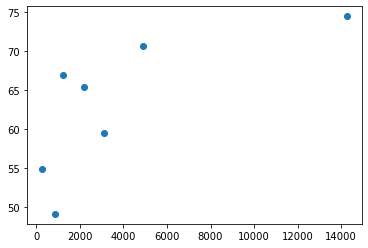

In [14]:
plt.scatter(df_gdp['1982 [YR1982]'],df_le['1982 [YR1982]'])

In [15]:
df_cluster.dtypes

Series Name       object
Series Code       object
Country Name      object
Country Code      object
1982 [YR1982]    float64
1983 [YR1983]    float64
1984 [YR1984]    float64
1985 [YR1985]    float64
1986 [YR1986]    float64
1987 [YR1987]    float64
1988 [YR1988]    float64
1989 [YR1989]    float64
1990 [YR1990]    float64
2012 [YR2012]    float64
2013 [YR2013]    float64
2014 [YR2014]    float64
2015 [YR2015]    float64
2016 [YR2016]    float64
2017 [YR2017]    float64
2018 [YR2018]    float64
2019 [YR2019]    float64
2020 [YR2020]    float64
dtype: object

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Latin America & Caribbean'),
  Text(1, 0, 'East Asia & Pacific'),
  Text(2, 0, 'Europe & Central Asia'),
  Text(3, 0, 'Middle East & North Africa'),
  Text(4, 0, 'North America'),
  Text(5, 0, 'South Asia'),
  Text(6, 0, 'Sub-Saharan Africa')])

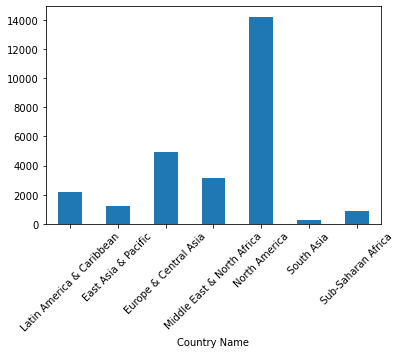

In [16]:
pd.to_numeric(df_gdp['1982 [YR1982]']).plot(kind = 'bar')
plt.xticks(rotation= 45)